In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
from geopy.distance import vincenty
import geopy
import numpy as np
import pandas as pd

max_d = 2 # Distancia maxima de 2km]

In [2]:
def calcula_distancias(locs_1, locs_2):
    n_linhas_1 = locs_1.shape[0]
    n_linhas_2 = locs_2.shape[0]
    dists = np.empty((n_linhas_1, n_linhas_2))
    for i in range(n_linhas_1):
        for j in range(n_linhas_2):
            dists[i, j] = geopy.distance.vincenty(locs_1[i], locs_2[j]).km
    return dists

In [3]:
locais = pd.read_excel('Planilha para distribuicao do efetivo.xlsx', sheet_name='dados')
locais[:5]

longitude 
 latitude 
 cod_localidade_tse 
 nom_localidade 
 nom_bairro 
 num_local 
 nom_local 
 des_endereco 
 codigo 
 lqtd_secoes 
 ... 
 indigenas 
 grupos 
 efetivo 
 crimes_eleitorais 
 boca_de_urna 
 roubo 
 furto 
 desacato 
 desobediencia 
 CV 
 
 
 
 
 0 
 -61.504226 
 -10.870787 
 89960 
 RONDOLÂNDIA 
 CENTRO 
 1015 
 ESCOLA ESTADUAL OLAVO BILAC 
 RUA MATHILDE KLEMS, S/N 
 61899601015 
 10 
 ... 
 0 
 295 
 2.000000 
 0 
 0 
 0 
 2 
 1 
 0 
 0 
 
 
 1 
 -60.941759 
 -10.475339 
 89960 
 RONDOLÂNDIA 
 ZONA RURAL 
 1066 
 ESCOLA ZAWA KAREY PANGYJY 
 ALDEIA INDÍGENA ZORÓ 
 61899601066 
 1 
 ... 
 267 
 297 
 2.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 -60.180703 
 -14.107886 
 90867 
 NOVA LACERDA 
 GLEBA SANTA AMÉLIA 
 1040 
 ESCOLA MUNICIPAL VALE DO GUAPORÉ 
 COMUNIDADE SANTA AMÉLIA 
 61908671040 
 1 
 ... 
 0 
 298 
 0.180556 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 -59.967301 
 -15.014093 
 91090 
 VILA BELA DA SANTÍSSIMA TRINDADE 
 JARDIM AEROPORTO 
 1341 
 CRECHE AVIAOZINHO 
 AVENIDA MARTIMIANO RIBEIRO DA FONSECA, S/N 
 25910901341 
 1 
 ... 
 0 
 125 
 0.208700 
 0 
 1 
 0 
 13 
 0 
 1 
 0 
 
 
 4 
 -59.950224 
 -15.003089 
 91090 
 VILA BELA DA SANTÍSSIMA TRINDADE 
 CENTRO 
 1171 
 CAMARA MUNICIPAL DE VILA BELA DA SANTISSIMA TR... 
 AV. SÃO LUIZ, S/N, VILA BELA DA SS. TRINDADE 
 25910901171 
 2 
 ... 
 0 
 125 
 0.600000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 5 rows × 21 columns

In [4]:
coords = locais[['longitude','latitude']].values

In [5]:
coords

array([[-61.50422603, -10.87078709],
       [-60.941759  , -10.475339  ],
       [-60.180703  , -14.107886  ],
       ...,
       [-50.511945  , -10.47179925],
       [-50.51073158, -10.46768262],
       [-50.296635  ,  -9.994842  ]])

In [6]:
matriz_distancias = calcula_distancias(coords, coords)

In [7]:
matriz_distancias

array([[0.00000000e+00, 6.61801777e+01, 2.29587452e+02, ...,
        1.22413550e+03, 1.22427559e+03, 1.24901215e+03],
       [6.61801777e+01, 0.00000000e+00, 2.16509550e+02, ...,
        1.16121113e+03, 1.16134618e+03, 1.18553983e+03],
       [2.29587452e+02, 2.16509550e+02, 0.00000000e+00, ...,
        1.10042873e+03, 1.10061520e+03, 1.13048953e+03],
       ...,
       [1.22413550e+03, 1.16121113e+03, 1.10042873e+03, ...,
        0.00000000e+00, 3.21690889e-01, 4.15135648e+01],
       [1.22427559e+03, 1.16134618e+03, 1.10061520e+03, ...,
        3.21690889e-01, 0.00000000e+00, 4.11970411e+01],
       [1.24901215e+03, 1.18553983e+03, 1.13048953e+03, ...,
        4.15135648e+01, 4.11970411e+01, 0.00000000e+00]])

In [8]:
d = matriz_distancias.shape[0]

v = d*(d - 1)/2
C = np.empty([int(round(v,0))])

ic = 0
for i in range(d):
    for j in range(i+1,d):
        # print(matriz_distancias[i,j])
        C[ic] = matriz_distancias[i,j]
        ic  =  ic + 1

In [9]:
C

array([ 66.18017766, 229.587452  , 283.50213756, ...,   0.32169089,
        41.5135648 ,  41.19704105])

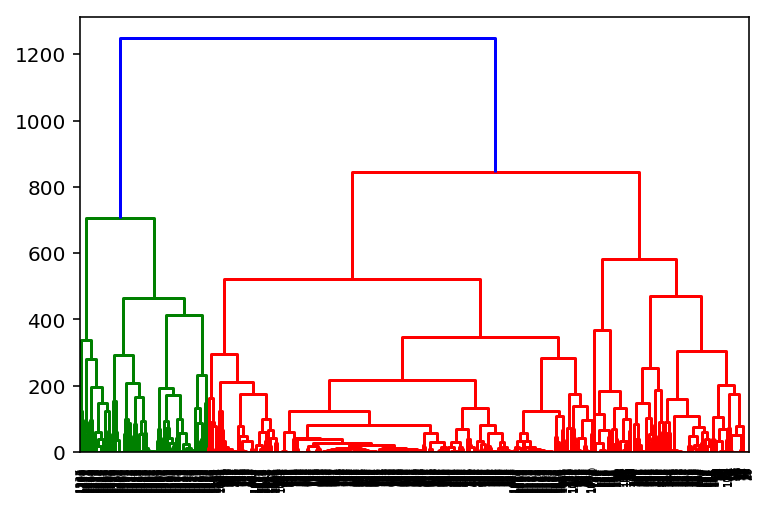

In [10]:
Z = linkage(C, 'complete')
dn = dendrogram(Z)

In [11]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [12]:
grupos = fcluster(Z, max_d, criterion='distance')

In [13]:
locais['GRUPOS'] = grupos

In [14]:
locais[:5]

longitude 
 latitude 
 cod_localidade_tse 
 nom_localidade 
 nom_bairro 
 num_local 
 nom_local 
 des_endereco 
 codigo 
 lqtd_secoes 
 ... 
 grupos 
 efetivo 
 crimes_eleitorais 
 boca_de_urna 
 roubo 
 furto 
 desacato 
 desobediencia 
 CV 
 GRUPOS 
 
 
 
 
 0 
 -61.504226 
 -10.870787 
 89960 
 RONDOLÂNDIA 
 CENTRO 
 1015 
 ESCOLA ESTADUAL OLAVO BILAC 
 RUA MATHILDE KLEMS, S/N 
 61899601015 
 10 
 ... 
 295 
 2.000000 
 0 
 0 
 0 
 2 
 1 
 0 
 0 
 336 
 
 
 1 
 -60.941759 
 -10.475339 
 89960 
 RONDOLÂNDIA 
 ZONA RURAL 
 1066 
 ESCOLA ZAWA KAREY PANGYJY 
 ALDEIA INDÍGENA ZORÓ 
 61899601066 
 1 
 ... 
 297 
 2.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 337 
 
 
 2 
 -60.180703 
 -14.107886 
 90867 
 NOVA LACERDA 
 GLEBA SANTA AMÉLIA 
 1040 
 ESCOLA MUNICIPAL VALE DO GUAPORÉ 
 COMUNIDADE SANTA AMÉLIA 
 61908671040 
 1 
 ... 
 298 
 0.180556 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 444 
 
 
 3 
 -59.967301 
 -15.014093 
 91090 
 VILA BELA DA SANTÍSSIMA TRINDADE 
 JARDIM AEROPORTO 
 1341 
 CRECHE AVIAOZINHO 
 AVENIDA MARTIMIANO RIBEIRO DA FONSECA, S/N 
 25910901341 
 1 
 ... 
 125 
 0.208700 
 0 
 1 
 0 
 13 
 0 
 1 
 0 
 440 
 
 
 4 
 -59.950224 
 -15.003089 
 91090 
 VILA BELA DA SANTÍSSIMA TRINDADE 
 CENTRO 
 1171 
 CAMARA MUNICIPAL DE VILA BELA DA SANTISSIMA TR... 
 AV. SÃO LUIZ, S/N, VILA BELA DA SS. TRINDADE 
 25910901171 
 2 
 ... 
 125 
 0.600000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 439 
 
 
 
 5 rows × 22 columns

In [15]:
res1 = pd.ExcelWriter('res1 VMD.xlsx')
locais.to_excel(res1,'dados',index=False)
res1.save()